In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [45]:
import fitsio
from astropy.table import Table
from astrometry.util.fits import fits_table

In [35]:
from legacypipe.runs import get_survey
from legacypipe.survey import bricks_touching_wcs, ccds_touching_wcs
from legacypipe.survey import LegacySurveyData

In [3]:
%matplotlib inline

In [16]:
output_dir = '/global/cscratch1/sd/ioannis/dr8/largest-gals'
SURVEY_DIR = '/global/project/projectdirs/cosmo/work/legacysurvey/dr8'
LSLGA_DIR = '/global/project/projectdirs/cosmo/staging/largegalaxies/v2.0'

In [46]:
LSLGA = fits_table(os.path.join(LSLGA_DIR, 'LSLGA-v2.0.fits'))

In [11]:
def read_all_ccds(dr='dr8'):
    """Read the CCDs files, treating DECaLS and BASS+MzLS separately.

    """
    from astrometry.libkd.spherematch import tree_open
    #survey = LegacySurveyData()

    kdccds_north = []
    for camera in ('90prime', 'mosaic'):
        ccdsfile = os.path.join(SURVEY_DIR, 'survey-ccds-{}-{}.kd.fits'.format(camera, dr))
        ccds = tree_open(ccdsfile, 'ccds')
        print('Read {} CCDs from {}'.format(ccds.n, ccdsfile))
        kdccds_north.append((ccdsfile, ccds))

    ccdsfile = os.path.join(SURVEY_DIR, 'survey-ccds-decam-{}.kd.fits'.format(dr))
    ccds = tree_open(ccdsfile, 'ccds')
    print('Read {} CCDs from {}'.format(ccds.n, ccdsfile))
    kdccds_south = (ccdsfile, ccds)

    return kdccds_north, kdccds_south

In [49]:
def simple_wcs(ra, dec, radius_arcmin, factor=1.0, pixscale=0.262):
    '''Build a simple WCS object for a single galaxy.
    
    '''
    from astrometry.util.util import Tan
    
    diam = np.ceil(factor * radius_arcmin * 60 / pixscale).astype('int') # [pixels]
    #print(ra, dec, diam)
    simplewcs = Tan(ra, dec, diam/2+0.5, diam/2+0.5,
                    -pixscale/3600.0, 0.0, 0.0, pixscale/3600.0, 
                    float(diam), float(diam))
    return simplewcs

In [50]:
#kdccds_north, kdccds_south = read_all_ccds()

In [51]:
big = LSLGA[LSLGA.galaxy == 'NGC5194'][0]
wcs = simple_wcs(big.ra, big.dec, big.d25, factor=1.2)
big

<tabledata object with 1 rows and 49 columns: lslga_id=1073844, galaxy=NGC5194, pgc=47404, ra=202.469547, dec=47.195151, type=SABb, bar=B, ring=nan, multiple=M, compactness=nan, t=4.0, pa=163.0, d25=13.708821, ba=0.85113806, diam_ref=iso, z=0.0015370633, sb_d25=22.921482, mag=8.608, mag_ref=B, wise_ra=202.4696996, wise_dec=47.1951717, cntr=2029146901351042304, w1mpro=8.84, w1sigmpro=0.024, w2mpro=8.664, w2sigmpro=0.02, w3mpro=6.19, w3sigmpro=0.023, w4mpro=3.386, w4sigmpro=0.036, rchi2=46.18, cc_flags=hhdd, ext_flg=5, ph_qual=AAAA, xscprox=0.43, w1rsemi=180.0, w1ba=0.91, w1pa=45.0, w1gmag=5.43, w1gerr=0.014, w2gmag=5.404, w2gerr=0.006, w3gmag=1.509, w3gerr=0.006, w4gmag=-0.28, w4gerr=0.03, in_allwise=True, in_desi=True, near_brightstar=False>

In [52]:
survey = get_survey('90prime-mosaic', survey_dir=SURVEY_DIR, output_dir=output_dir)

In [57]:
ccds, bricks = survey.ccds_touching_wcs(wcs), bricks_touching_wcs(wcs, survey=survey)

9 bricks nearby
No overlap with brick 2018p472
No overlap with brick 2029p472
No overlap with brick 2023p475
No overlap with brick 2026p475


In [60]:
len(ccds), len(np.unique(ccds.image_filename))

(29, 18)

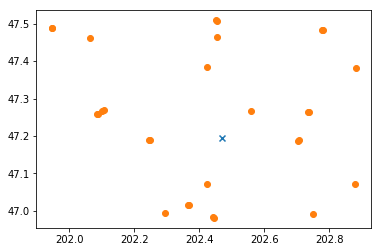

In [56]:
plt.scatter(big.ra, big.dec, marker='x')
plt.scatter(ccds.ra, ccds.dec)